<a href="https://colab.research.google.com/github/Mattobad/Data-Science/blob/master/End_to_end_dog_breed_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "drive/My Drive/Data/dog-breed-identification.zip" -d "drive/My Drive/Data/dogbreed/"

## End to end Multi-class Dog Breed Classification

This notebook builds an end to end multi-class classifier using TensorFlow 2.0 and Tensorflow Hub

#### 1. Problem
Identifying the breed of a dog given an image of a dog.

#### 2. Data
Taken from the Kaggle's Dog Breed Identification competition.
https://www.kaggle.com/c/dog-breed-identification/data

#### 3. Evaluation
The evaluation is a file with predictionn probabilities for each dog breed of each test image.
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

#### 4. Features
Some info about data:
* We're dealing with images(unstructure data) so we're using deep learning/transfer learning
* There are 120 breeds of dogs(this means there are 120 different classes to classify)


### Get our workspace ready
* Import tensorfow 2.x 
* Import tensorflow hub
* Make sure we're using a GPU

In [ ]:
# # Import Tensorflow into Colab
# import tensorflow as tf
# print("TF version:",tf.__version__)

TF version: 1.15.0


In [ ]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)

print("TF HUB version:", hub.__version__)
#Check for GPU availability
print("GPU","available (YESS!!)" if tf.config.list_physical_devices("GPU") else "GPU not available")

TF version: 2.2.0
TF HUB version: 0.8.0
GPU available (YESS!!)


#### Turning images into Tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

labels_csv = pd.read_csv('drive/My Drive/Data/dogbreed/labels.csv')
print(labels_csv.describe())
labels_csv.head(2)

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     56ce679c6526e48ea5b034d4f3226c80  scottish_deerhound
freq                                   1                 126


id        breed
0  000bec180eb18c7604dcecc8fe0dba07  boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97        dingo

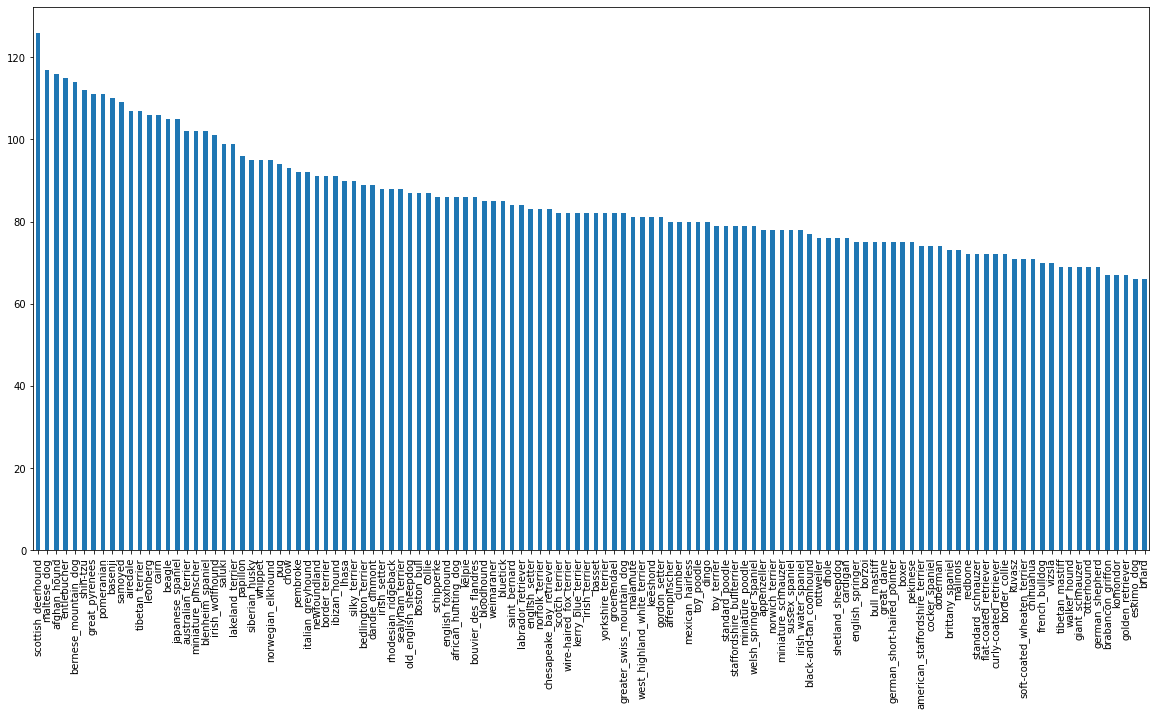

In [ ]:
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

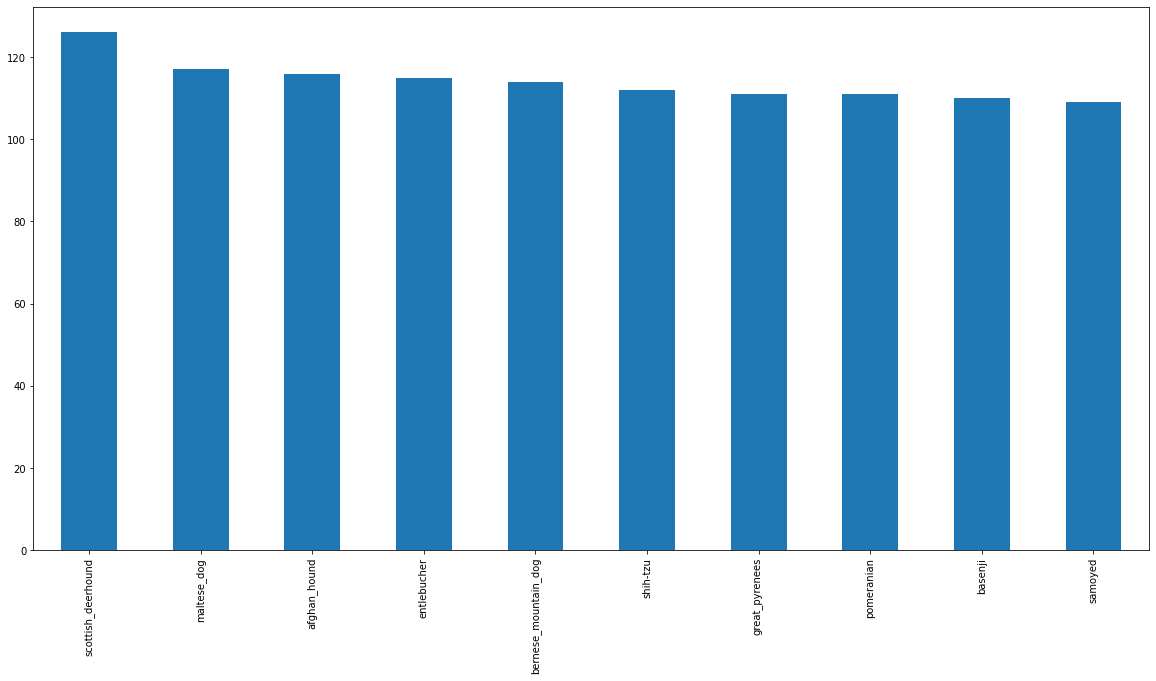

In [ ]:
labels_csv.breed.value_counts()[:10].plot.bar(figsize=(20,10))

In [ ]:
labels_csv.breed.value_counts().median()

82.0

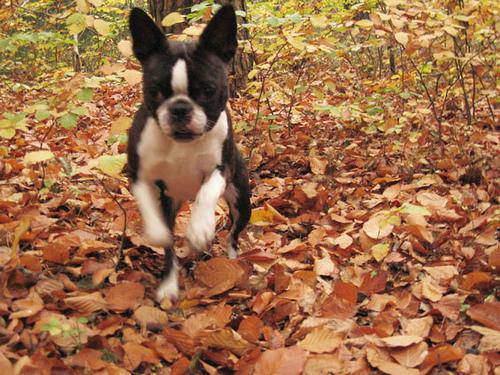

In [ ]:
# Let's view an image
from IPython.display import Image
Image("drive/My Drive/Data/dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

#### Getting images and their labels
let's get a list of all of image  file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ['drive/My Drive/Data/dogbreed/train/'+fname+'.jpg' for fname in labels_csv['id']]

# check the first 10
filenames[:10]

['drive/My Drive/Data/dogbreed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data/dogbreed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data/dogbreed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data/dogbreed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data/dogbreed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data/dogbreed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data/dogbreed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data/dogbreed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data/dogbreed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data/dogbreed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/My Drive/Data/dogbreed/train/')) == len(filenames):
  print('Filenames match the actual file length!!')
else:
  print('Filenames doesn\'t match the acutal file length')

Filenames match the actual file length!!


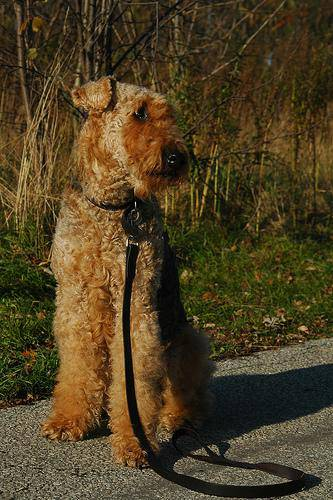

In [ ]:
# One more check
Image(filenames[5000])

In [ ]:
# convert labels into numeric
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if the number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Matches")
else:
  print("Numbers doesn't matches")

Matches


In [ ]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
print(unique_breeds)
type(unique_breeds)

['affenpinscher' 'afghan_hound' 'african_hunting_dog' 'airedale'
 'american_staffordshire_terrier' 'appenzeller' 'australian_terrier'
 'basenji' 'basset' 'beagle' 'bedlington_terrier' 'bernese_mountain_dog'
 'black-and-tan_coonhound' 'blenheim_spaniel' 'bloodhound' 'bluetick'
 'border_collie' 'border_terrier' 'borzoi' 'boston_bull'
 'bouvier_des_flandres' 'boxer' 'brabancon_griffon' 'briard'
 'brittany_spaniel' 'bull_mastiff' 'cairn' 'cardigan'
 'chesapeake_bay_retriever' 'chihuahua' 'chow' 'clumber' 'cocker_spaniel'
 'collie' 'curly-coated_retriever' 'dandie_dinmont' 'dhole' 'dingo'
 'doberman' 'english_foxhound' 'english_setter' 'english_springer'
 'entlebucher' 'eskimo_dog' 'flat-coated_retriever' 'french_bulldog'
 'german_shepherd' 'german_short-haired_pointer' 'giant_schnauzer'
 'golden_retriever' 'gordon_setter' 'great_dane' 'great_pyrenees'
 'greater_swiss_mountain_dog' 'groenendael' 'ibizan_hound' 'irish_setter'
 'irish_terrier' 'irish_water_spaniel' 'irish_wolfhound'
 'italian

numpy.ndarray

In [ ]:
# Turn evey label into a boolean array
boolean_labels = [label ==unique_breeds for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
print(labels[0])   # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax())  # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

In [ ]:
# Create X & y 
X = filenames
y = boolean_labels

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [ ]:
# let'split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)

len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

#### Preprocessing images(turning images into Tensors)
function for proprocessing does:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variabel `image`
3. Turn `image` (jpg) into Tensors
4. Normalize our image(convert color channel values from 0-255 to 0-1
5. Resize the `image` to be a shape of(224,224)
6. Return the modified `image`

For more info check the links out:
https://www.tensorflow.org/guide/data

https://www.tensorflow.org/tutorials/load_data/csv

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(),image.min()

(255, 0)

In [ ]:
image[:1]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# function to convert the image into tensor
#define image size
IMG_SIZE = 224

#Create function for preprocessing
def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  #Read in an image file
  image = tf.io.read_file(image_path)
  #Turn the jpeg image into numerical Tensor with 3(RGB) color channels
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value(244,244)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

#### Turning data into batches

1. Why turn data into batches?
32 batches at a time (batches/streaming)
Let's say you're trying to process 10,000+ images in one go as they all might not fit into memory

So, that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this:
`(image,label)`
yann lecun batch size
jeremy howard batch size


In [ ]:
# Create a simple functin to return a tuple (image,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and the assosciated label, process the image and returns a tuple of (image,label)
  """
  image = process_image(image_path)
  return image,label

In [ ]:
# let's convert all the data (X & y) into batches!
BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data out of images (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # IF the data is a test datasets, we probably don't have labels
  if test_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a validation dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function
    # is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create(image,label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    #Turn the training the data into batches
    data_batch = data.batch(BATCH_SIZE)
  
  return data_batch


                                              



In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches....


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#### Visaulizing Data Batches
Our data is now in batches,however, these can be a little hard to understand/comprehend, let's visualize them

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # loop for displayin 25 images
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    #Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis('off')


In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# converting train data(BAtch shapes) into iterator
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

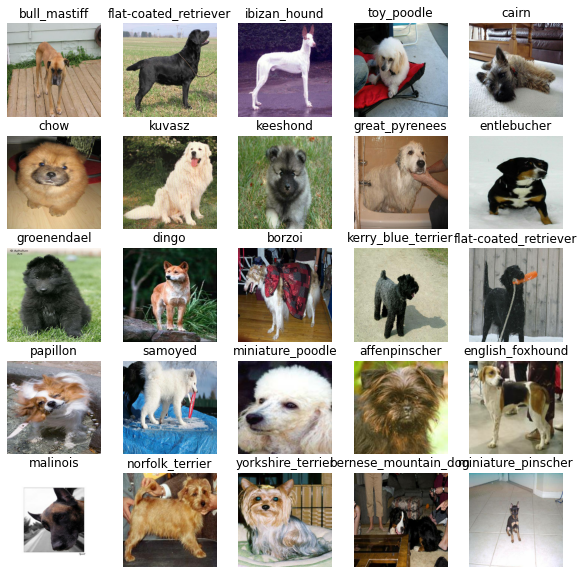

In [ ]:
# Now let's visualize the dat in a training batch
show_25_images(train_images,train_labels)

### Building a model
Before we build a model, there are a few things we need to define:
* The `input` shape( in the form of Tensors) to our model
* The `output` shape( int the form of Tensors)
* The `URL` of the model we want to use.
https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
###### More Links to follow:
* https://www.tensorflow.org/guide/keras/overview
* https://tfhub.dev/
* https://paperswithcode.com/
* https://modelzoo.co/
* https://pytorch.org/hub/


In [ ]:
# Setup input shape to the model
INPUT_SHAPE =[None,IMG_SIZE,IMG_SIZE,3]  # batch, height,width, color channels

#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL From Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

#### Putting the data into Keras deep learning model
Now, let's create a function which:
* Takes the input shape, output shape, and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion
* Compiles the model(say it should be evaluated and improved)
* Builds the model(tells the model the input shape it'll be getting)
* Returns the model

All the steps is found here:
* https://www.tensorflow.org/guide/keras/overview

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('Building model with:', MODEL_URL)

  # SEtup the model layers
  model = tf.keras.Sequential([
            hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
            tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                  activation='softmax')  # Layers 2 (output layer)

  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### Creating callbacks
Callbacks are the helper function a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

We'll create two callbacks, one for `TensorBoard` which helps track our models progress and another for `early stopping` which prevents our model from training for too long.

***TensorBoard Callback***
To setup a TensorBoard callbackm we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function
3. Visualize our models training logs with the `%tensorboard` magic function(we'll do this after model training)


In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join('drive/My Drive/Data/dogbreed/logs',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                        )
  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callbacks

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

### Training a model (on subset of data)
Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider",min:10,max:100,step:10}

In [ ]:
# Check to make sure we're still running on a GPU
print("GPU is availabel") if tf.config.list_physical_devices("GPU") else "not available"

GPU is availabel


 Let's create a function which trains a model
 * Create a model using `create_model()`
 * Setup a TensorBoard callback using `create_tensorboard_callback()`
 * Call the `fit()` function on our model passing it th training data, validation data, number of epochs to train for and the callbacks we'd like to use
 * Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the traine version.
  """
  #Create a model
  model =create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created 
  model.fit(x= train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 548s 22s/step - loss: 4.5384 - accuracy: 0.0975 - val_loss: 3.3798 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 5s 187ms/step - loss: 1.6036 - accuracy: 0.6700 - val_loss: 2.1473 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 5s 186ms/step - loss: 0.5500 - accuracy: 0.9400 - val_loss: 1.6643 - val_accuracy: 0.6100
Epoch 4/100
25/25 [==============================] - 5s 185ms/step - loss: 0.2458 - accuracy: 0.9937 - val_loss: 1.4944 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 5s 193ms/step - loss: 0.1430 - accuracy: 0.9987 - val_loss: 1.4129 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 5s 189ms/step - loss: 0.0981 - accuracy: 1.0000 - val_loss: 1.3700 - val_accuracy: 0.6400
Epoch 7/100
25/25 [==============================

**Questions:** Our modelling is overfitting as it fails to generalized for validation datasets, what are ways to prevent model overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is a good thing! It means our model is learning!!

#### Checking the TensorBoard logs
The TensorBoard magic function (`%tensorbaord`) will access the logs directory we created earlier and visualize its content.

In [ ]:
%tensorboard --logdir drive/My\ Drive/Data/dogbreed/logs

<IPython.core.display.Javascript object>


### Making and evaluating predictions using a trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 119ms/step


array([[1.1647128e-03, 1.8324046e-05, 1.1874215e-03, ..., 2.7553991e-05,
        8.5776173e-06, 2.0643622e-03],
       [2.5604246e-03, 7.9698781e-05, 5.2440115e-03, ..., 2.2839158e-04,
        2.1390372e-03, 3.2934509e-04],
       [2.2431028e-05, 1.1494744e-03, 1.5366830e-05, ..., 5.2772048e-05,
        2.3595267e-05, 6.5759075e-04],
       ...,
       [1.7004110e-06, 2.7365728e-05, 2.4095392e-05, ..., 2.7316395e-05,
        9.2100381e-05, 1.0361185e-05],
       [8.6527122e-03, 2.1059258e-04, 4.5193968e-04, ..., 1.7303770e-04,
        4.1746389e-05, 2.0250874e-02],
       [6.6956517e-04, 1.4894479e-05, 7.1810192e-04, ..., 2.2955802e-03,
        1.4481095e-03, 1.7471417e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
#First prediction
index =0
print(predictions[index])
print(f'Max value (Probability of prediction): {np.max(predictions[index])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'predicted label: {unique_breeds[np.argmax(predictions[index])]}')

[4.6424731e-04 2.2032585e-04 2.0266478e-03 5.6504177e-05 6.7423179e-04
 2.0676557e-04 2.0775462e-02 2.5178780e-04 7.5351571e-05 3.2682606e-04
 4.2740066e-04 1.7643836e-03 2.8079559e-04 4.3145337e-05 5.6848745e-04
 1.5054636e-04 1.5923193e-04 1.3168409e-01 6.7513638e-06 8.6873122e-05
 5.0139352e-04 1.3095009e-03 9.1392874e-05 9.0678287e-04 2.3790788e-05
 3.1719281e-04 2.1774767e-01 6.8409900e-05 9.4217370e-04 3.9305037e-04
 3.8464885e-04 3.7650450e-04 1.6596637e-03 1.6464945e-05 2.1269511e-04
 1.7648170e-02 5.4963606e-05 6.6497020e-04 4.0457839e-05 8.3456198e-06
 3.1141614e-04 2.6711947e-05 5.7132125e-05 6.8969035e-04 2.6917851e-05
 2.3107926e-04 2.9327204e-05 8.0590916e-04 2.1360497e-04 7.1927243e-05
 2.6189693e-04 3.4888447e-04 5.5375433e-04 9.4436189e-05 2.0496243e-04
 2.6910975e-05 2.2552663e-04 4.8670680e-03 7.9540041e-04 1.4992099e-01
 1.1773605e-04 2.6693533e-05 1.1343324e-03 1.4283672e-05 3.5122890e-04
 4.8941472e-03 3.6554097e-04 3.6423226e-04 1.5808858e-02 2.2832023e-04
 9.525

In [ ]:
unique_breeds[26]

'cairn'

Having the above functionality is great but we want to be able to do it at scale.
And it would be even better if we could see the image with prediction being made.

**Note:** Prediction probabilities are also k/a confidence interval

In [ ]:
# Turn prediction probabilities into their respective label(easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]



In [ ]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[9])
pred_label

'collie'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns separate arrays 
  of images and labels.
  """
  images =[]
  labels = []
  # loop through unbatched data
  for image,label in val_data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchify the validation data
val_images,val_labels = unbatchify(val_data)

val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[0])

'cairn'

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some function to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
* Convert the prediction probabilities to a predicted label
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot

In [ ]:
#
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n],labels[n],images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                  np.max(pred_prob)*100,
                                  true_label),
                                  color=color)

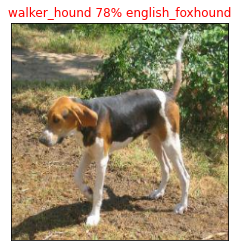

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=42)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This funciton will:
* Take an `input` of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes
  * Predicition probabilities values
  * Prediction labels

* Plot the top 10 prediction probability values and labels, coloring the true label green

In [ ]:
# Create a function to plot to 10 prediction for a label
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plus the top 10 highest prediciton confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n],labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]   # -1 here reverse the outcome
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')
  
  # Change color of true label
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

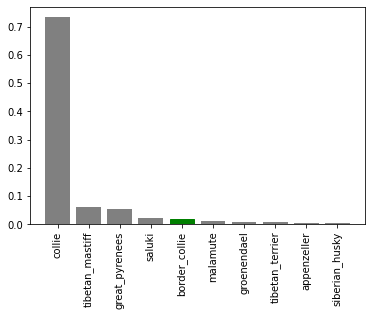

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

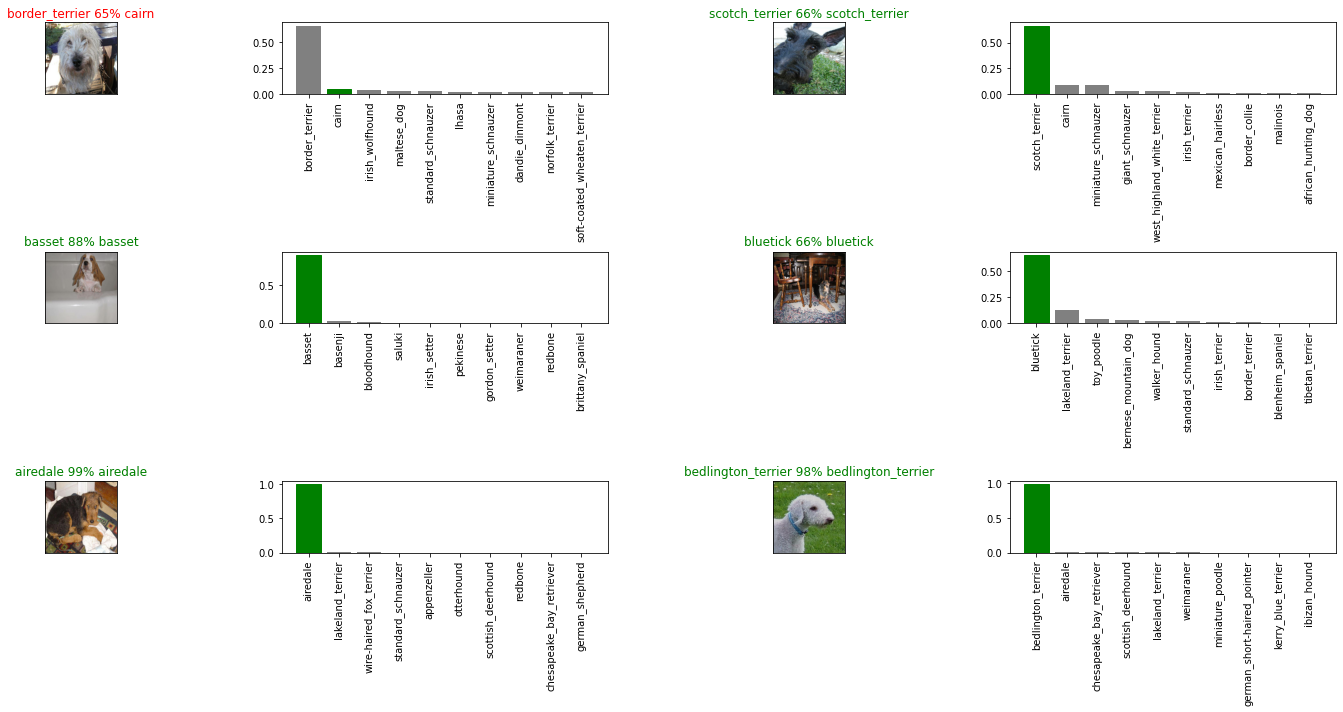

In [ ]:
#Let's visualize with bar graph w.r.t their image
i_multiplier =0

num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_cols))

for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probabilities=predictions,
                 labels=val_labels,
                  images=val_images,
                 n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)


plt.tight_layout(h_pad=1.0)
plt.show()

**Challenge:** How would you create a confusion matrix with our models predictions and true labels?

### Saving the trained model

In [ ]:
# Create a function to save a model
def save_model(model,suffix=None):
  """
  Save a given model in a models directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/My Drive/Data/dogbreed/models',
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir +'-'+ suffix+".pb" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path


In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a model directory
  """
  print(f'loading saved model from: {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model,suffix='1000-images-mobilenettv2-Adam')

Saving model to: drive/My Drive/Data/dogbreed/models/20200628-015831-1000-images-mobilenettv2-Adam.pb...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: drive/My Drive/Data/dogbreed/models/20200628-015831-1000-images-mobilenettv2-Adam.pb/assets


INFO:tensorflow:Assets written to: drive/My Drive/Data/dogbreed/models/20200628-015831-1000-images-mobilenettv2-Adam.pb/assets


'drive/My Drive/Data/dogbreed/models/20200628-015831-1000-images-mobilenettv2-Adam.pb'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Data/dogbreed/models/20200229-013911-1000-images-mobilenettv2-Adam.h5')

loading saved model from: drive/My Drive/Data/dogbreed/models/20200229-013911-1000-images-mobilenettv2-Adam.h5


In [ ]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 206ms/step - loss: 1.2881 - accuracy: 0.6550


[1.2881425789424352, 0.655]

In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 139ms/step - loss: 1.2881 - accuracy: 0.6550


[1.2881425789424352, 0.655]

## Training model with full datasets

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)


In [ ]:
# fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Train for 320 steps
Epoch 1/100
320/320 [==============================] - 5441s 17s/step - loss: 1.3548 - accuracy: 0.6631
Epoch 2/100
320/320 [==============================] - 53s 165ms/step - loss: 0.4004 - accuracy: 0.8829
Epoch 3/100
320/320 [==============================] - 52s 162ms/step - loss: 0.2372 - accuracy: 0.9346
Epoch 4/100
320/320 [==============================] - 49s 152ms/step - loss: 0.1546 - accuracy: 0.9643
Epoch 5/100
320/320 [==============================] - 52s 163ms/step - loss: 0.1076 - accuracy: 0.9779
Epoch 6/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0786 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 51s 158ms/step - loss: 0.0579 - accuracy: 0.9921
Epoch 8/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0475 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 51s 159ms/step - loss: 0.0382 - accuracy: 0.9961
Epoch 10/100
320/320 [======================

In [ ]:
# Save the full trained model
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/My Drive/Data/dogbreed/models/20200229-043426-full-image-set-mobilenetv2-Adam.h5...


'drive/My Drive/Data/dogbreed/models/20200229-043426-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('drive/My Drive/Data/dogbreed/models/20200229-043426-full-image-set-mobilenetv2-Adam.h5')

loading saved model from: drive/My Drive/Data/dogbreed/models/20200229-043426-full-image-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset
Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily, we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches` and setting the `test_data` parameter to `True` (since the test data doesn't have labels.)
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = 'drive/My Drive/Data/dogbreed/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Data/dogbreed/test/f0fc06a2b2123325e34a2450d3202853.jpg',
 'drive/My Drive/Data/dogbreed/test/efcb9740d2350a5aba4344ae5994eb37.jpg',
 'drive/My Drive/Data/dogbreed/test/ed9bab128c26470e18631cb6f3454c99.jpg',
 'drive/My Drive/Data/dogbreed/test/f538a1d1a9e50417ea346429ea3e940c.jpg',
 'drive/My Drive/Data/dogbreed/test/e9b105a5b7873f33477f777d5a9447f8.jpg',
 'drive/My Drive/Data/dogbreed/test/ec2a07ae6eaa64dac4154584ef229937.jpg',
 'drive/My Drive/Data/dogbreed/test/eddf1be0c12c7f3a5029a7787e89476f.jpg',
 'drive/My Drive/Data/dogbreed/test/ee878152e29a6b6ce288b44b358f9d05.jpg',
 'drive/My Drive/Data/dogbreed/test/f377a8251538b962741e18c944875038.jpg',
 'drive/My Drive/Data/dogbreed/test/ea0a6a12e3f6f65e4f742b258a0ffe30.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames,test_data=True)

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about an ~1hr)

In [ ]:
# Make predicitons on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 3601s 11s/step


In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt('drive/My Drive/Data/dogbreed/preds_array.csv',test_predictions,delimiter=',')

In [ ]:
 # Load predictions (Numpy array)  from csv file
test_predictions = np.loadtxt('drive/My Drive/Data/dogbreed/preds_array.csv',delimiter=',')

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
# Preparing test predictions into proper csv format
# Create a pandas DAtaFrame with empty columns
preds_df = pd.DataFrame(columns=['id']+list(unique_breeds))
preds_df.head()


Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df['id'] = test_ids
preds_df.head()

id  ... yorkshire_terrier
0  f0fc06a2b2123325e34a2450d3202853  ...               NaN
1  efcb9740d2350a5aba4344ae5994eb37  ...               NaN
2  ed9bab128c26470e18631cb6f3454c99  ...               NaN
3  f538a1d1a9e50417ea346429ea3e940c  ...               NaN
4  e9b105a5b7873f33477f777d5a9447f8  ...               NaN

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  ... yorkshire_terrier
0  f0fc06a2b2123325e34a2450d3202853  ...       3.35377e-08
1  efcb9740d2350a5aba4344ae5994eb37  ...       5.93749e-08
2  ed9bab128c26470e18631cb6f3454c99  ...       1.12548e-05
3  f538a1d1a9e50417ea346429ea3e940c  ...       3.87851e-10
4  e9b105a5b7873f33477f777d5a9447f8  ...       1.28391e-09

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv('drive/My Drive/Data/dogbreed/full_model_predictions.csv',index=False)

## Making predictions on custom images
To make predictions on custom images, we'll:
* Get the filepaths of our sample images
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `tes_data` parameter to True.
* Pass the custom image data batch to our models `predict()` method.
* Convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [ ]:
# Get custom image filepaths
custom_path = 'drive/My Drive/Data/dogbreed/dog-sample-photos/'
custom_images_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_images_paths,test_data=True)
custom_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(4, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [ get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['golden_retriever', 'pomeranian', 'golden_retriever', 'pomeranian']

In [ ]:
#
custom_images = []
# loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

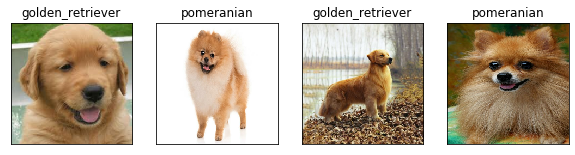

In [ ]:
# Check custom image predictions
n_rows = 1
n_cols = 4
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(n_rows,n_cols,i+1) # rows, columns, index
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)